# Welcome to The Notebook
---

In this guided-project we are going to cover the following tasks: 

- Task 1: Loading the customer reviews dataset
- Task 2: Clean and preprocess the reviews
- Task 3: Tokenize the reviews and removing the stop words
- Task 4: Exploring the tokens and product categories
- Task 5: Extracting the adjectives in the reviews
- Task 6: Finding the sentiment of each review 


Importing the modules

In [1]:
import pandas as pd 
import string 

# Importing Natural Language Processing toolkit 
import nltk

# Downloading the NLTK english stop words
nltk.download('stopwords')

# Downloading the NLTK sentence tokenizer
nltk.download('punkt')

# Downloading the NLTK POS Tagger
nltk.download('averaged_perceptron_tagger')

# Downloading the NLTK Vader Lexicon
nltk.download('vader_lexicon')

# Importing the NLTK english stop words 
from nltk.corpus import stopwords

# Importing frequency distribution from NLTK
from nltk.probability import FreqDist

# Importing VADER dictionary. It is a rule-based sentiment analyzer
from nltk.sentiment import SentimentIntensityAnalyzer

# Importing data visualization modules 
from wordcloud import WordCloud
import plotly.express as px 
import matplotlib.pyplot as plt

print("Modules are imported! :)")

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Administrator\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Administrator\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Administrator\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Administrator\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


Modules are imported! :)


## Task 1

### Loading the customer reviews dataset
---

In [2]:
data= pd.read_csv('dataset.csv')

In [3]:
data.head()

product_review product_category
0  I love, love, love this jumpsuit. it's fun, fl...          Bottoms
1  Beautifully made pants and on trend with the f...          Bottoms
2  I never would have given these pants a second ...          Bottoms
3  These pants are even better in person. the onl...          Bottoms
4  The silhouette and length of this skirt and le...          Bottoms

Let's check the shape of the data frame

In [4]:
data.shape

(3376, 2)

Let's check the first `product_review`

In [5]:
data.product_review[0]

"I love, love, love this jumpsuit. it's fun, flirty, and fabulous! every time i wear it, i get nothing but great compliments!"

Checking the number of reviews per product category

In [6]:
data.product_category.value_counts()

Bottoms     685
Dresses     681
Tops        680
Jackets     680
Intimate    650
Name: product_category, dtype: int64

## Task 2 

### Clean and preprocess the reviews

- Lower casing
- Removing the punctuations

---

In [7]:
data.head()

product_review product_category
0  I love, love, love this jumpsuit. it's fun, fl...          Bottoms
1  Beautifully made pants and on trend with the f...          Bottoms
2  I never would have given these pants a second ...          Bottoms
3  These pants are even better in person. the onl...          Bottoms
4  The silhouette and length of this skirt and le...          Bottoms

Converting all the reveiews to lower case.
It is make sure that all the words in difference case are treat as the same word.

In [8]:
review= data.product_review[0]
review.lower()

"i love, love, love this jumpsuit. it's fun, flirty, and fabulous! every time i wear it, i get nothing but great compliments!"

In [9]:
data.product_review =data.product_review.str.lower()

In [10]:
#check
data.head()

product_review product_category
0  i love, love, love this jumpsuit. it's fun, fl...          Bottoms
1  beautifully made pants and on trend with the f...          Bottoms
2  i never would have given these pants a second ...          Bottoms
3  these pants are even better in person. the onl...          Bottoms
4  the silhouette and length of this skirt and le...          Bottoms

Removing the punctuations

In [11]:
data.product_review[0].translate(str.maketrans('','',string.punctuation))

'i love love love this jumpsuit its fun flirty and fabulous every time i wear it i get nothing but great compliments'

Let's remove the punctuations from all the reviews

In [12]:
data.product_review= data.product_review.str.translate(str.maketrans('','',string.punctuation))

In [13]:
data.head()

product_review product_category
0  i love love love this jumpsuit its fun flirty ...          Bottoms
1  beautifully made pants and on trend with the f...          Bottoms
2  i never would have given these pants a second ...          Bottoms
3  these pants are even better in person the only...          Bottoms
4  the silhouette and length of this skirt and le...          Bottoms

## Task 3 

### Tokenize the reviews and removing the stop words 
---
- <b>Tokenization</b> is the process of breaking down a continuous stream of text, such as a sentence or a paragraph, into smaller units called tokens. These tokens typically correspond to words, but can also represent subword units like prefixes, suffixes, and stems.

- <b>Tokenization</b> facilitates the transformation of text into a format that machine learning algorithms can understand.

In [14]:
tokens= nltk.word_tokenize(data.product_review[0])
tokens

['i',
 'love',
 'love',
 'love',
 'this',
 'jumpsuit',
 'its',
 'fun',
 'flirty',
 'and',
 'fabulous',
 'every',
 'time',
 'i',
 'wear',
 'it',
 'i',
 'get',
 'nothing',
 'but',
 'great',
 'compliments']

Let's remove the Stop Words
    
<b>Stop words</b> are common words (e.g., "the," "and," "is") that appear frequently in a language and have little semantic value. Removing them is essential in natural language processing tasks to reduce data size, speed up processing, and improve the accuracy of algorithms by focusing on more informative words that convey the actual meaning of a text.


In [15]:
english_stopwords= stopwords.words("English")
english_stopwords.extend(['im','its', 'youre', 'every', 'thing', 'cant','dont', 'doesnt'])
english_stopwords

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

Let's remove the stop words from the `tokens` list

In [16]:
[t for t in tokens if t not in english_stopwords]

['love',
 'love',
 'love',
 'jumpsuit',
 'fun',
 'flirty',
 'fabulous',
 'time',
 'wear',
 'get',
 'nothing',
 'great',
 'compliments']

Let's tokenize all the reviews 

In [17]:
data['product_review_tokenized']= data.product_review.apply(nltk.word_tokenize)
data.head()

product_review product_category  \
0  i love love love this jumpsuit its fun flirty ...          Bottoms   
1  beautifully made pants and on trend with the f...          Bottoms   
2  i never would have given these pants a second ...          Bottoms   
3  these pants are even better in person the only...          Bottoms   
4  the silhouette and length of this skirt and le...          Bottoms   

                            product_review_tokenized  
0  [i, love, love, love, this, jumpsuit, its, fun...  
1  [beautifully, made, pants, and, on, trend, wit...  
2  [i, never, would, have, given, these, pants, a...  
3  [these, pants, are, even, better, in, person, ...  
4  [the, silhouette, and, length, of, this, skirt...

remove the stopwords from the tokenized reviews

In [18]:
def remove_stopwords(tokens):
    return [t for t in tokens if t not in english_stopwords]
data['Cleadned_tokens']=data.product_review_tokenized.apply(remove_stopwords)
data.head()

product_review product_category  \
0  i love love love this jumpsuit its fun flirty ...          Bottoms   
1  beautifully made pants and on trend with the f...          Bottoms   
2  i never would have given these pants a second ...          Bottoms   
3  these pants are even better in person the only...          Bottoms   
4  the silhouette and length of this skirt and le...          Bottoms   

                            product_review_tokenized  \
0  [i, love, love, love, this, jumpsuit, its, fun...   
1  [beautifully, made, pants, and, on, trend, wit...   
2  [i, never, would, have, given, these, pants, a...   
3  [these, pants, are, even, better, in, person, ...   
4  [the, silhouette, and, length, of, this, skirt...   

                                     Cleadned_tokens  
0  [love, love, love, jumpsuit, fun, flirty, fabu...  
1  [beautifully, made, pants, trend, flared, crop...  
2  [never, would, given, pants, second, look, onl...  
3  [pants, even, better, person, downside, need, ...  
4  [silhouette, length, skirt, length, flattering...

Let's recreate the reviews from the cleaned tokens again

In [19]:
data['product_review_cleaned']= data.Cleadned_tokens.apply(lambda x: " ".join(x))
data.head()

product_review product_category  \
0  i love love love this jumpsuit its fun flirty ...          Bottoms   
1  beautifully made pants and on trend with the f...          Bottoms   
2  i never would have given these pants a second ...          Bottoms   
3  these pants are even better in person the only...          Bottoms   
4  the silhouette and length of this skirt and le...          Bottoms   

                            product_review_tokenized  \
0  [i, love, love, love, this, jumpsuit, its, fun...   
1  [beautifully, made, pants, and, on, trend, wit...   
2  [i, never, would, have, given, these, pants, a...   
3  [these, pants, are, even, better, in, person, ...   
4  [the, silhouette, and, length, of, this, skirt...   

                                     Cleadned_tokens  \
0  [love, love, love, jumpsuit, fun, flirty, fabu...   
1  [beautifully, made, pants, trend, flared, crop...   
2  [never, would, given, pants, second, look, onl...   
3  [pants, even, better, person, downside, need, ...   
4  [silhouette, length, skirt, length, flattering...   

                              product_review_cleaned  
0  love love love jumpsuit fun flirty fabulous ti...  
1  beautifully made pants trend flared crop much ...  
2  never would given pants second look online per...  
3  pants even better person downside need dry cle...  
4  silhouette length skirt length flattering clas...

## Task 4

### Exploring the tokens and product categories

In [20]:
data.head()

product_review product_category  \
0  i love love love this jumpsuit its fun flirty ...          Bottoms   
1  beautifully made pants and on trend with the f...          Bottoms   
2  i never would have given these pants a second ...          Bottoms   
3  these pants are even better in person the only...          Bottoms   
4  the silhouette and length of this skirt and le...          Bottoms   

                            product_review_tokenized  \
0  [i, love, love, love, this, jumpsuit, its, fun...   
1  [beautifully, made, pants, and, on, trend, wit...   
2  [i, never, would, have, given, these, pants, a...   
3  [these, pants, are, even, better, in, person, ...   
4  [the, silhouette, and, length, of, this, skirt...   

                                     Cleadned_tokens  \
0  [love, love, love, jumpsuit, fun, flirty, fabu...   
1  [beautifully, made, pants, trend, flared, crop...   
2  [never, would, given, pants, second, look, onl...   
3  [pants, even, better, person, downside, need, ...   
4  [silhouette, length, skirt, length, flattering...   

                              product_review_cleaned  
0  love love love jumpsuit fun flirty fabulous ti...  
1  beautifully made pants trend flared crop much ...  
2  never would given pants second look online per...  
3  pants even better person downside need dry cle...  
4  silhouette length skirt length flattering clas...

Let's take a look at the product categories again

In [21]:
data.product_category.value_counts()

Bottoms     685
Dresses     681
Tops        680
Jackets     680
Intimate    650
Name: product_category, dtype: int64

Let's combine all the tokens used in reviews for the `Tops`

In [22]:
tops_tokens=[]

for x in data[data.product_category == 'Tops'].Cleadned_tokens:
    tops_tokens.extend(x)
tops_tokens

['shirt',
 'flattering',
 'due',
 'adjustable',
 'front',
 'tie',
 'perfect',
 'length',
 'wear',
 'leggings',
 'sleeveless',
 'pairs',
 'well',
 'cardigan',
 'love',
 'shirt',
 'aded',
 'basket',
 'hte',
 'last',
 'mintue',
 'see',
 'would',
 'look',
 'like',
 'person',
 'store',
 'pick',
 'went',
 'teh',
 'darkler',
 'color',
 'pale',
 'hte',
 'color',
 'really',
 'gorgeous',
 'turns',
 'mathced',
 'everythiing',
 'trying',
 'prefectly',
 'little',
 'baggy',
 'hte',
 'xs',
 'hte',
 'msallet',
 'size',
 'bummer',
 'petite',
 'decided',
 'jkeep',
 'though',
 'said',
 'matvehd',
 'everything',
 'ejans',
 'pants',
 '3',
 'skirts',
 'waas',
 'trying',
 'kept',
 'oops',
 'took',
 'chance',
 'blouse',
 'glad',
 'wasnt',
 'crazy',
 'blouse',
 'photographed',
 'model',
 'paired',
 'whit',
 'white',
 'pants',
 'worked',
 'perfectly',
 'crisp',
 'clean',
 'would',
 'describe',
 'launders',
 'well',
 'fits',
 'great',
 'drape',
 'perfect',
 'wear',
 'tucked',
 'go',
 'wrong',
 'love',
 'shirt',


Let's find the 20 most common words in the `Tops` products' reviews 

In [23]:
freq_dist = FreqDist(tops_tokens)
freq_dist.most_common(20)

[('love', 337),
 ('top', 334),
 ('wear', 233),
 ('great', 229),
 ('size', 211),
 ('color', 185),
 ('shirt', 172),
 ('fit', 167),
 ('perfect', 146),
 ('small', 141),
 ('like', 140),
 ('soft', 136),
 ('flattering', 128),
 ('little', 120),
 ('one', 119),
 ('sweater', 118),
 ('fits', 112),
 ('bought', 111),
 ('well', 109),
 ('would', 109)]

Exercise: Find the 20 most common words in the `Dresses` products' reviews 

In [24]:
dresses_tokens= []
for x in data[data.product_category == 'Dresses'].Cleadned_tokens:
    dresses_tokens.extend(x)
dresses_tokens

['normally',
 'review',
 'purchases',
 'amazed',
 'poorly',
 'dress',
 'made',
 'couldnt',
 'help',
 'post',
 'review',
 'neck',
 'line',
 'isnt',
 'even',
 'hemmed',
 'flaps',
 'material',
 'thin',
 'feel',
 'cheap',
 'dress',
 'isnt',
 'even',
 'worth',
 '20',
 'opinion',
 'expecting',
 'well',
 'made',
 'good',
 'quality',
 'dress',
 'high',
 'price',
 'tag',
 'typically',
 'write',
 'bad',
 'reviews',
 'dress',
 'bad',
 'want',
 'save',
 'someone',
 'else',
 'buying',
 'read',
 'mostly',
 'bad',
 'reviews',
 'still',
 'purchased',
 'anyway',
 'fault',
 'know',
 'dress',
 'super',
 'stiff',
 'know',
 'denim',
 'way',
 'possible',
 'would',
 'soften',
 'washes',
 'typically',
 '68',
 'size',
 'small',
 'swallowed',
 'xs',
 'big',
 'everywhere',
 'except',
 'bust',
 'ordered',
 'sizes',
 'try',
 'wouldnt',
 'recommend',
 'buying',
 'size',
 '8',
 'small',
 'loved',
 'photo',
 'dress',
 'upon',
 'examination',
 'dress',
 'trying',
 'receiving',
 'mail',
 'dress',
 'shown',
 'online',
 

In [25]:
FreqDist(dresses_tokens).most_common(20)

[('dress', 1062),
 ('like', 321),
 ('fabric', 254),
 ('would', 220),
 ('size', 207),
 ('fit', 207),
 ('back', 166),
 ('look', 157),
 ('really', 154),
 ('love', 152),
 ('ordered', 146),
 ('material', 139),
 ('small', 128),
 ('looks', 119),
 ('looked', 118),
 ('much', 111),
 ('also', 106),
 ('top', 105),
 ('wear', 105),
 ('way', 103)]

## Task 5

### Extracting the adjectives used in the reviews

In [26]:
data.head()

product_review product_category  \
0  i love love love this jumpsuit its fun flirty ...          Bottoms   
1  beautifully made pants and on trend with the f...          Bottoms   
2  i never would have given these pants a second ...          Bottoms   
3  these pants are even better in person the only...          Bottoms   
4  the silhouette and length of this skirt and le...          Bottoms   

                            product_review_tokenized  \
0  [i, love, love, love, this, jumpsuit, its, fun...   
1  [beautifully, made, pants, and, on, trend, wit...   
2  [i, never, would, have, given, these, pants, a...   
3  [these, pants, are, even, better, in, person, ...   
4  [the, silhouette, and, length, of, this, skirt...   

                                     Cleadned_tokens  \
0  [love, love, love, jumpsuit, fun, flirty, fabu...   
1  [beautifully, made, pants, trend, flared, crop...   
2  [never, would, given, pants, second, look, onl...   
3  [pants, even, better, person, downside, need, ...   
4  [silhouette, length, skirt, length, flattering...   

                              product_review_cleaned  
0  love love love jumpsuit fun flirty fabulous ti...  
1  beautifully made pants trend flared crop much ...  
2  never would given pants second look online per...  
3  pants even better person downside need dry cle...  
4  silhouette length skirt length flattering clas...

### Part of Speech Tagging


<b>Part of Speech:</b> The grammatical role of a word in a sentence. A part of speech is one of the nine types of English words: VERB, NOUN, ADJECTIVE, ADVERB, PRONOUN, PREPOSITION, DETERMINER, CONJUNCTION, INTERJECTION.

In [29]:
data.product_review[0]

'i love love love this jumpsuit its fun flirty and fabulous every time i wear it i get nothing but great compliments'

In [31]:
nltk.download('tagsets')
nltk.help.upenn_tagset()

$: dollar
    $ -$ --$ A$ C$ HK$ M$ NZ$ S$ U.S.$ US$
'': closing quotation mark
    ' ''
(: opening parenthesis
    ( [ {
): closing parenthesis
    ) ] }
,: comma
    ,
--: dash
    --
.: sentence terminator
    . ! ?
:: colon or ellipsis
    : ; ...
CC: conjunction, coordinating
    & 'n and both but either et for less minus neither nor or plus so
    therefore times v. versus vs. whether yet
CD: numeral, cardinal
    mid-1890 nine-thirty forty-two one-tenth ten million 0.5 one forty-
    seven 1987 twenty '79 zero two 78-degrees eighty-four IX '60s .025
    fifteen 271,124 dozen quintillion DM2,000 ...
DT: determiner
    all an another any both del each either every half la many much nary
    neither no some such that the them these this those
EX: existential there
    there
FW: foreign word
    gemeinschaft hund ich jeux habeas Haementeria Herr K'ang-si vous
    lutihaw alai je jour objets salutaris fille quibusdam pas trop Monte
    terram fiche oui corporis ...
IN: preposition or

[nltk_data] Downloading package tagsets to
[nltk_data]     C:\Users\Administrator\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping help\tagsets.zip.


In [30]:
nltk.pos_tag(data.product_review_tokenized[0])

[('i', 'NN'),
 ('love', 'VBP'),
 ('love', 'NN'),
 ('love', 'NN'),
 ('this', 'DT'),
 ('jumpsuit', 'NN'),
 ('its', 'PRP$'),
 ('fun', 'NN'),
 ('flirty', 'NN'),
 ('and', 'CC'),
 ('fabulous', 'JJ'),
 ('every', 'DT'),
 ('time', 'NN'),
 ('i', 'NN'),
 ('wear', 'VBP'),
 ('it', 'PRP'),
 ('i', 'JJ'),
 ('get', 'VBP'),
 ('nothing', 'NN'),
 ('but', 'CC'),
 ('great', 'JJ'),
 ('compliments', 'NNS')]

Let's use the POS-tagger to assign part of speech to all the tokens of all of the reviews

In [32]:
data['POS_tokens']= data.product_review_tokenized.apply(nltk.pos_tag)
data.head()

product_review product_category  \
0  i love love love this jumpsuit its fun flirty ...          Bottoms   
1  beautifully made pants and on trend with the f...          Bottoms   
2  i never would have given these pants a second ...          Bottoms   
3  these pants are even better in person the only...          Bottoms   
4  the silhouette and length of this skirt and le...          Bottoms   

                            product_review_tokenized  \
0  [i, love, love, love, this, jumpsuit, its, fun...   
1  [beautifully, made, pants, and, on, trend, wit...   
2  [i, never, would, have, given, these, pants, a...   
3  [these, pants, are, even, better, in, person, ...   
4  [the, silhouette, and, length, of, this, skirt...   

                                     Cleadned_tokens  \
0  [love, love, love, jumpsuit, fun, flirty, fabu...   
1  [beautifully, made, pants, trend, flared, crop...   
2  [never, would, given, pants, second, look, onl...   
3  [pants, even, better, person, downside, need, ...   
4  [silhouette, length, skirt, length, flattering...   

                              product_review_cleaned  \
0  love love love jumpsuit fun flirty fabulous ti...   
1  beautifully made pants trend flared crop much ...   
2  never would given pants second look online per...   
3  pants even better person downside need dry cle...   
4  silhouette length skirt length flattering clas...   

                                          POS_tokens  
0  [(i, NN), (love, VBP), (love, NN), (love, NN),...  
1  [(beautifully, RB), (made, VBN), (pants, NNS),...  
2  [(i, NN), (never, RB), (would, MD), (have, VB)...  
3  [(these, DT), (pants, NNS), (are, VBP), (even,...  
4  [(the, DT), (silhouette, NN), (and, CC), (leng...

Let's extract the adjectives used in each review

In [33]:
def extract_adj(tokens):
    adjectives= []
    for x in tokens:
        if x[1] in ['JJ', 'JJR','JJS']:
            adjectives.append(x[0])
    return adjectives
data['adjectives']= data.POS_tokens.apply(extract_adj)
data.head()

product_review product_category  \
0  i love love love this jumpsuit its fun flirty ...          Bottoms   
1  beautifully made pants and on trend with the f...          Bottoms   
2  i never would have given these pants a second ...          Bottoms   
3  these pants are even better in person the only...          Bottoms   
4  the silhouette and length of this skirt and le...          Bottoms   

                            product_review_tokenized  \
0  [i, love, love, love, this, jumpsuit, its, fun...   
1  [beautifully, made, pants, and, on, trend, wit...   
2  [i, never, would, have, given, these, pants, a...   
3  [these, pants, are, even, better, in, person, ...   
4  [the, silhouette, and, length, of, this, skirt...   

                                     Cleadned_tokens  \
0  [love, love, love, jumpsuit, fun, flirty, fabu...   
1  [beautifully, made, pants, trend, flared, crop...   
2  [never, would, given, pants, second, look, onl...   
3  [pants, even, better, person, downside, need, ...   
4  [silhouette, length, skirt, length, flattering...   

                              product_review_cleaned  \
0  love love love jumpsuit fun flirty fabulous ti...   
1  beautifully made pants trend flared crop much ...   
2  never would given pants second look online per...   
3  pants even better person downside need dry cle...   
4  silhouette length skirt length flattering clas...   

                                          POS_tokens  \
0  [(i, NN), (love, VBP), (love, NN), (love, NN),...   
1  [(beautifully, RB), (made, VBN), (pants, NNS),...   
2  [(i, NN), (never, RB), (would, MD), (have, VB)...   
3  [(these, DT), (pants, NNS), (are, VBP), (even,...   
4  [(the, DT), (silhouette, NN), (and, CC), (leng...   

                                          adjectives  
0                               [fabulous, i, great]  
1                                     [flared, much]  
2   [second, much, cuter, right, small, loose, navy]  
3                                        [only, dry]  
4  [classic, comfortable, favorite, different, hi...

Let's combine all the `adjectives` for the `Tops`.

In [36]:
adj_tops = ""
for x in data[data.product_category == 'Tops'].adjectives:
    adj_tops += ' '.join(x)+ ' '

In [37]:
adj_tops

'flattering due adjustable perfect cardigan last i pale gorgeous little hte ejans i glad i white crisp clean i great perfect wear cant wrong wasnt seethrough white careful i great comfy classic quirky beautiful practical cropped boxy perfect longer camisole little thin small gorgeous unsnapped skinny true great casual flare grey back nice beautiful ordinary usual tight chest i cute plaid great local comfortable bad little dressier small black top comfortable comfortable good perfect roomy warm cute collar beautiful unique busty top small wouldve fit better adorable bib favorite small perfect soft comfortable unusual asymmetrical front visual little ive adorable i comfortable feminine great dark perfect wish happy comfortable flattering comfortable light top lovely floral great white top happy top online little i little large petite longer regular perfect give soft comfortable short much uncomfortable doesnt easier navy boxy whole cute more fabric i super read same specific petite weigh

Let's visualize the adjectives using a wordcloud

In [38]:
word_cloud = WordCloud(width = 800, height=600, background_color='white').generate(adj_tops)

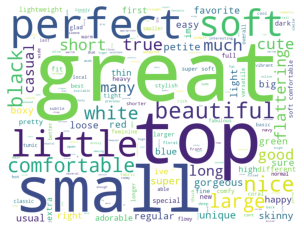

In [39]:
plt.imshow(word_cloud)
plt.axis('off')
plt.show()

<b>Exercise</b>: Write a python method that gets a product category name and combine the adjectives used in the reviews related to the input category and visualize them using a word cloud.

In [44]:
def visualize_adjectives(category):
    acjectives= ''
    
    for x in data[data.product_category==  category].adjectives:
        acjectives+= ' '.join(x) + ' '
    word_cloud= WordCloud(width= 800, height= 600, background_color='white').generate(acjectives)
    plt.imshow(word_cloud)
    plt.axis('off')
    plt.show()
    

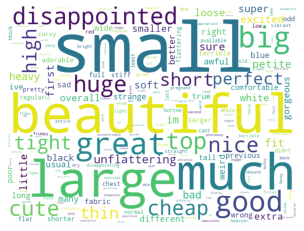

In [45]:
visualize_adjectives('Dresses')

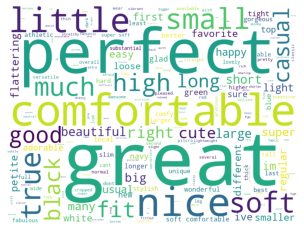

In [46]:
visualize_adjectives('Bottoms')

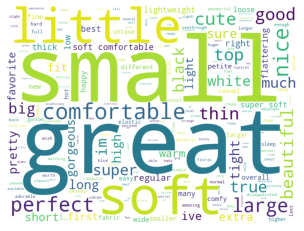

In [48]:
visualize_adjectives('Intimate')

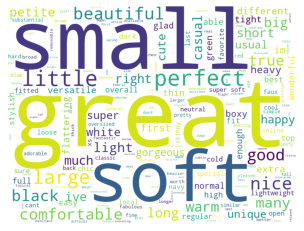

In [47]:
visualize_adjectives('Jackets')

## Task 6 

### Finding the sentiment of each review 

In [49]:
data.head()

product_review product_category  \
0  i love love love this jumpsuit its fun flirty ...          Bottoms   
1  beautifully made pants and on trend with the f...          Bottoms   
2  i never would have given these pants a second ...          Bottoms   
3  these pants are even better in person the only...          Bottoms   
4  the silhouette and length of this skirt and le...          Bottoms   

                            product_review_tokenized  \
0  [i, love, love, love, this, jumpsuit, its, fun...   
1  [beautifully, made, pants, and, on, trend, wit...   
2  [i, never, would, have, given, these, pants, a...   
3  [these, pants, are, even, better, in, person, ...   
4  [the, silhouette, and, length, of, this, skirt...   

                                     Cleadned_tokens  \
0  [love, love, love, jumpsuit, fun, flirty, fabu...   
1  [beautifully, made, pants, trend, flared, crop...   
2  [never, would, given, pants, second, look, onl...   
3  [pants, even, better, person, downside, need, ...   
4  [silhouette, length, skirt, length, flattering...   

                              product_review_cleaned  \
0  love love love jumpsuit fun flirty fabulous ti...   
1  beautifully made pants trend flared crop much ...   
2  never would given pants second look online per...   
3  pants even better person downside need dry cle...   
4  silhouette length skirt length flattering clas...   

                                          POS_tokens  \
0  [(i, NN), (love, VBP), (love, NN), (love, NN),...   
1  [(beautifully, RB), (made, VBN), (pants, NNS),...   
2  [(i, NN), (never, RB), (would, MD), (have, VB)...   
3  [(these, DT), (pants, NNS), (are, VBP), (even,...   
4  [(the, DT), (silhouette, NN), (and, CC), (leng...   

                                          adjectives  
0                               [fabulous, i, great]  
1                                     [flared, much]  
2   [second, much, cuter, right, small, loose, navy]  
3                                        [only, dry]  
4  [classic, comfortable, favorite, different, hi...

Let's find the sentiment of the reviews

In [52]:
sent= SentimentIntensityAnalyzer()
review= data.product_review_cleaned[0]
print(review)
score= sent.polarity_scores(review)
print(score)

love love love jumpsuit fun flirty fabulous time wear get nothing great compliments
{'neg': 0.177, 'neu': 0.159, 'pos': 0.665, 'compound': 0.9464}


### Sentiment scores:

- `pos`: The probability of `positive` sentiment
- `neu`: The probability of `neutral` sentiment
- `neg`: The probability of `negative` sentiment
- `compound`: The normalized `compound` score that takes values from -1 to 1

We can use the `compound` score to find the sentiment of each review.

- if compound score>=0.05 then `positive` 
- if compound score between -0.05 and 0.05 then `neutral` 
- if compound score<=-0.05 then `negative` 


Now let's create a method to find the sentiment of a review using the compound score

In [53]:
def polarity_score(review):
    # Initilizing the Sentiment Analyzer
    sent = SentimentIntensityAnalyzer()
   
    # Extracting the sentiment polarity scores of a review
    scores = sent.polarity_scores(review)
    
    # Getting the compound score
    compound = scores['compound']
    
    if compound > 0.05:
        return "positive"
    elif compound < -0.5:
        return "negative"
    else:
        return "neutral"



Let's label all the reviews with sentiment

In [58]:
data['sentiment']= data.product_review_cleaned.apply(polarity_score)
data.head()

product_review product_category  \
0  i love love love this jumpsuit its fun flirty ...          Bottoms   
1  beautifully made pants and on trend with the f...          Bottoms   
2  i never would have given these pants a second ...          Bottoms   
3  these pants are even better in person the only...          Bottoms   
4  the silhouette and length of this skirt and le...          Bottoms   

                            product_review_tokenized  \
0  [i, love, love, love, this, jumpsuit, its, fun...   
1  [beautifully, made, pants, and, on, trend, wit...   
2  [i, never, would, have, given, these, pants, a...   
3  [these, pants, are, even, better, in, person, ...   
4  [the, silhouette, and, length, of, this, skirt...   

                                     Cleadned_tokens  \
0  [love, love, love, jumpsuit, fun, flirty, fabu...   
1  [beautifully, made, pants, trend, flared, crop...   
2  [never, would, given, pants, second, look, onl...   
3  [pants, even, better, person, downside, need, ...   
4  [silhouette, length, skirt, length, flattering...   

                              product_review_cleaned  \
0  love love love jumpsuit fun flirty fabulous ti...   
1  beautifully made pants trend flared crop much ...   
2  never would given pants second look online per...   
3  pants even better person downside need dry cle...   
4  silhouette length skirt length flattering clas...   

                                          POS_tokens  \
0  [(i, NN), (love, VBP), (love, NN), (love, NN),...   
1  [(beautifully, RB), (made, VBN), (pants, NNS),...   
2  [(i, NN), (never, RB), (would, MD), (have, VB)...   
3  [(these, DT), (pants, NNS), (are, VBP), (even,...   
4  [(the, DT), (silhouette, NN), (and, CC), (leng...   

                                          adjectives sentiment  
0                               [fabulous, i, great]  positive  
1                                     [flared, much]  positive  
2   [second, much, cuter, right, small, loose, navy]  positive  
3                                        [only, dry]  positive  
4  [classic, comfortable, favorite, different, hi...  positive

In [59]:
df = data.groupby(['product_category', 'sentiment']).size().reset_index(name= 'counts')

In [60]:
df

product_category sentiment  counts
0           Bottoms   neutral       6
1           Bottoms  positive     679
2           Dresses  negative      35
3           Dresses   neutral      76
4           Dresses  positive     570
5          Intimate  negative       3
6          Intimate   neutral      33
7          Intimate  positive     614
8           Jackets  negative       2
9           Jackets   neutral       8
10          Jackets  positive     670
11             Tops  negative       1
12             Tops   neutral       4
13             Tops  positive     675

In [63]:
px.bar(df, x= 'product_category', y= 'counts', color= 'sentiment', barmode= 'group')